In [2]:

import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
#from tensorflow import set_random_seed
import tensorflow

from keras.layers import Input, Dropout
from keras.layers.core import Dense 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json

In [3]:
data = pd.read_csv("baldwin_pump_data.csv")

### Important : In the below table, 0 row number corresponds to the row number 2 in the excel file as the
### count in pandas df starts with 0, while from 1 in excel and the first row in excel is for the column names
### which is not the case here, so any index here can be found in excel file using index + 2 ###

In [4]:
data.head()

Unnamed: 0  BFP_SEAL_WATER_FLOW  BFP_SUCT_HDR_PRESS________  \
0  5/1/98 0:00                14.35                      136.18   
1  5/1/98 0:05                14.35                      136.18   
2  5/1/98 0:10                14.35                      136.18   
3  5/1/98 0:15                14.35                      136.18   
4  5/1/98 0:20                14.34                      136.18   

   AUX_CDSR_2B_PRESS_________  BFP_SUCTION_HDR_TEMP______  \
0                        29.2                       88.57   
1                        29.2                       88.57   
2                        29.2                       88.57   
3                        29.2                       88.57   
4                        29.2                       88.57   

   BFPT_B_VALVE_DEMAND_HP_STO  BFPT_B_VALVE_DEMAND_LP_STO  \
0                        0.01                         0.0   
1                        0.01                         0.0   
2                        0.01                         0.0   
3                        0.01                         0.0   
4                        0.01                         0.0   

   BFPT_B_CALC_VALVE_DEMAND__  2B_TDBFP_RECIRC_VLV_DMD___  \
0                         0.0                       99.98   
1                         0.0                       99.98   
2                         0.0                       99.98   
3                         0.0                       99.98   
4                         0.0                       99.98   

   BFP_2B_DISCHARGE_FLOW_____  ...  BFPT_2B_RAD_SHAFT_VIB_IB_B  \
0                         0.0  ...                         NaN   
1                         0.0  ...                         NaN   
2                         0.0  ...                         NaN   
3                         0.0  ...                         NaN   
4                         0.0  ...                         NaN   

   BFP_2B_AXIAL_SHAFT_VIB____  BFPT_2B_THRUST_BRG_WEAR___  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

   BFP_2B_RAD_SHAFT_VIB_OB_BR  BFP_2B_RAD_SHAFT_VIB_IB_BR  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

   BFPT_2B_AXIAL_SHAFT_VIB___  MAIN_STEAM_FLOW_TO_BFPS___  \
0                         NaN                         0.0   
1                         NaN                         0.0   
2                         NaN                         0.0   
3                         NaN                         0.0   
4                         NaN                         0.0   

   EXT_STM_FLOW_TO_BFP_2B____  CW_FRM_AUX_CDSR_2B________  CW_TO_AUX_CDS_2B  
0                         NaN                       68.11             65.72  
1                         NaN                       68.11             65.72  
2                         NaN                       68.11             65.72  
3                         NaN                       68.11             65.72  
4                         NaN                       68.11             65.72  

[5 rows x 48 columns]

In [5]:
#Data description
data.describe()

BFP_SEAL_WATER_FLOW  BFP_SUCT_HDR_PRESS________  \
count         12646.000000                 8547.000000   
mean             23.281107                  123.979296   
std               8.301245                   51.385183   
min               0.000000                    1.380000   
25%              18.720000                   62.325000   
50%              21.700000                  144.790000   
75%              26.290000                  155.730000   
max              72.000000                  264.420000   

       AUX_CDSR_2B_PRESS_________  BFP_SUCTION_HDR_TEMP______  \
count                12646.000000                12649.000000   
mean                    17.955497                  213.078506   
std                     12.305330                  119.658073   
min                      1.590000                   72.380000   
25%                      4.872500                   94.560000   
50%                     29.130000                  120.450000   
75%                     29.360000                  338.290000   
max                     30.680000                  348.830000   

       BFPT_B_VALVE_DEMAND_HP_STO  BFPT_B_VALVE_DEMAND_LP_STO  \
count                12649.000000                12649.000000   
mean                    13.272376                   11.068407   
std                     14.894889                   14.488882   
min                      0.000000                    0.000000   
25%                      0.000000                    0.000000   
50%                      0.000000                    0.000000   
75%                     30.010000                   30.010000   
max                     30.010000                   49.620000   

       BFPT_B_CALC_VALVE_DEMAND__  2B_TDBFP_RECIRC_VLV_DMD___  \
count                12649.000000                12649.000000   
mean                    21.738481                   56.207975   
std                     24.908255                   49.565824   
min                      0.000000                    0.000000   
25%                      0.000000                    0.000000   
50%                      0.000000                   99.980000   
75%                     46.700000                   99.980000   
max                    100.000000                   99.980000   

       BFP_2B_DISCHARGE_FLOW_____  BFP_2B_IBRD_SEAL_INJ_FLOW_  ...  \
count                12649.000000                  903.000000  ...   
mean                   919.609857                   10.764109  ...   
std                    966.810058                    5.507140  ...   
min                      0.000000                    5.020000  ...   
25%                      0.000000                    7.130000  ...   
50%                    163.350000                    9.950000  ...   
75%                   1971.650000                   11.300000  ...   
max                   2522.390000                   34.280000  ...   

       BFPT_2B_RAD_SHAFT_VIB_IB_B  BFP_2B_AXIAL_SHAFT_VIB____  \
count                12553.000000                 6934.000000   
mean                     1.355384                    1.621853   
std                      1.451068                    0.972700   
min                      0.020000                    0.000000   
25%                      0.020000                    1.710000   
50%                      0.030000                    1.760000   
75%                      2.940000                    1.830000   
max                      4.090000                    7.100000   

       BFPT_2B_THRUST_BRG_WEAR___  BFP_2B_RAD_SHAFT_VIB_OB_BR  \
count                12575.000000                10219.000000   
mean                    -1.309330                    0.416506   
std                      6.702563                    0.366319   
min                    -15.790000                    0.000000   
25%                     -8.060000                    0.000000   
50%                     -3.050000                    0.680000   
75%                      5.990000                    0

In [6]:
#Covariance matrix for the dataset
data.cov()

BFP_SEAL_WATER_FLOW  BFP_SUCT_HDR_PRESS________  \
BFP_SEAL_WATER_FLOW                   68.910671                   30.217594   
BFP_SUCT_HDR_PRESS________            30.217594                 2640.436993   
AUX_CDSR_2B_PRESS_________           -23.510388                 -439.704388   
BFP_SUCTION_HDR_TEMP______           324.571026                 4630.906508   
BFPT_B_VALVE_DEMAND_HP_STO            17.404069                  540.456321   
BFPT_B_VALVE_DEMAND_LP_STO            -3.068938                  435.576218   
BFPT_B_CALC_VALVE_DEMAND__            37.044842                  890.472058   
2B_TDBFP_RECIRC_VLV_DMD___           -54.530548                -1815.397241   
BFP_2B_DISCHARGE_FLOW_____          1028.462469                35334.722468   
BFP_2B_IBRD_SEAL_INJ_FLOW_           -22.710727                   53.529536   
BFP_2B_OBRD_SEAL_INJ_FLOW_             2.561702                    2.541350   
2B_TDBFP_DISCHARGE_FLOW___          1022.098290                35352.512615   
BFP_2B_BAL_DRUM_FLOW______            15.105925                  465.170345   
2B_TDBFP_RECIRC_VLV_POS___           -54.880389                -1828.669085   
BFP_DSCH_HDR_PRESS________          2412.661859                43584.631851   
BFP_2B_LUBE_OIL_PRESS_____            47.582780                  241.292795   
BFPT_2B_FIRST_STAGE_PRESS_            27.678154                  828.974352   
2B_TDBFP_RECIRC_FLOW______            23.370711                  113.506288   
BFPT_B_LP_SPEED_INPUT__1__          3166.704760               100545.212304   
BFPT_B_LP_SPEED_INPUT__2__          3165.984984               100540.771264   
BFP_DISCHARGE_HEADER_TEMP_           341.275584                 4736.074651   
BFP_2B_THRUST_BRG_TEMP____            71.385819                 1019.173959   
BFP_2B_IN_BRG_TEMP________            65.596321                  730.017329   
BFP_2B_OUT_BRG_TEMP_______            65.297748                  666.471649   
BFPT_2B_BRG_1_DRAIN_TEMP__            82.294375                 1203.498767   
BFPT_2B_BRG_2_DRAIN_TEMP__            15.532166                  981.506009   
BFPT_2B_THRUST_BRG_DRAIN__            80.597205                 1144.826301   
BFP_2B_BARREL_TOP_IBRD_TEM           300.315705                 3714.292806   
BFP_2B_BARREL_BOT_IBRD_TEM           254.239563                 3405.601282   
BFP_2B_BARREL_TOP_OBRD_TEM           282.502316                 3501.095018   
BFP_2B_BARREL_BOT_OBRD_TEM           251.360503                 3037.790041   
BFPT_2B_IN_BRG_MTL_TEMP___            75.082040                 1253.359638   
BFP_2B_IBRD_SEAL_INJ_DRN_T           152.295958                 1501.849127   
BFP_2B_OBRD_SEAL_INJ_DRN_T           149.064402                 1394.366087   
2B_BFPT_ROTOR_VIB_OBRG____            -1.006131                    5.794136   
2B_BFPT_ROTOR_VIB_IBRB____             2.283169                   37.866651   
BFPT_2B_RAD_SHAFT_VIB_OB_B             0.180479                    4.375086   
BFPT_2B_RAD_SHAFT_VIB_IB_B             2.091131                   53.875104   
BFP_2B_AXIAL_SHAFT_VIB____            -2.428922                   18.593541   
BFPT_2B_THRUST_BRG_WEAR___            12.514425                  233.487523   
BFP_2B_RAD_SHAFT_VIB_OB_BR             0.063698                   10.967173   
BFP_2B_RAD_SHAFT_VIB_IB_BR             0.511686                   14.646616   
BFPT_2B_AXIAL_SHAFT_VIB___            -0.385243                    0.852843   
MAIN_STEAM_FLOW_TO_BFPS___            -1.439294                   -7.805840   
EXT_STM_FLOW_TO_BFP_2B____           -10.209664                 1109.393334   
CW_FRM_AUX_CDSR_2B________            28.380656                  345.131722   
CW_TO_AUX_CDS_2B                      16.465138                   66.183484   

                            AUX_CDSR_2B_PRESS_________  \
BFP_SEAL_WATER_FLOW                         -23.510388   
BFP_SUCT_HDR_PRESS________                 -439.704388   
AUX_CDSR_2B_PRESS_________                  151.421156   
BFP

In [7]:
# Grouping the data based on "BFPT_B_LP_SPEED_INPUT__1__" column.
data.groupby("BFPT_B_LP_SPEED_INPUT__1__").count()

Unnamed: 0  BFP_SEAL_WATER_FLOW  \
BFPT_B_LP_SPEED_INPUT__1__                                    
0.00                              6237                 6234   
0.01                                 2                    2   
0.04                                 1                    1   
0.06                                 1                    1   
0.08                                 2                    2   
0.12                                 3                    3   
0.13                                 1                    1   
0.18                                 1                    1   
0.20                                 1                    1   
0.22                                 1                    1   
0.24                                 1                    1   
0.28                                 1                    1   
0.30                                 1                    1   
0.35                                 1                    1   
0.41                                 1                    1   
0.42                                 2                    2   
0.45                                 1                    1   
0.46                                 1                    1   
0.49                                 1                    1   
0.51                                 1                    1   
0.57                                 1                    1   
0.61                                 1                    1   
0.62                                 1                    1   
0.63                                 1                    1   
0.66                                 2                    2   
0.73                                 1                    1   
0.77                                 1                    1   
0.78                                 1                    1   
0.82                                 1                    1   
0.83                                 1                    1   
...                                ...                  ...   
5751.57                              1                    1   
5751.70                              1                    1   
5752.25                              1                    1   
5752.76                              1                    1   
5752.92                              1                    1   
5753.59                              1                    1   
5754.27                              1                    1   
5754.94                              1                    1   
5755.62                              1                    1   
5756.29                              1                    1   
5758.55                              1                    1   
5769.77                              1                    1   
5786.78                              1                    1   
5803.79                              1                    1   
5818.25                              1                    1   
5820.50                              1                    1   
5820.80                              1                    1   
5822.75                              1                    1   
5825.00                              1                    1   
5827.25                              1                    1   
5829.50                              1                    1   
5831.75                              1                    1   
5834.00                              1                    1   
5836.25                              1                    1   
5837.81                              1                    1   
5838.50                              1                    1   
5840.75                              1                    1   
5843.00                              1                    1   
5845.25                              1                    1   
5847.50                              1                    1   

                            BFP_SUCT_HDR_PRESS________  \


In [8]:
#Statistics of the columns, with data grouped on "BFPT_B_LP_SPEED_INPUT__1__" column.
data.groupby("BFPT_B_LP_SPEED_INPUT__1__").agg({'AUX_CDSR_2B_PRESS_________':{'avg':'mean','sd':'std'},'BFP_SUCT_HDR_PRESS________':{'avg':'mean','sd':'std'}}).reset_index()

/home/ankit/.local/lib/python3.5/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


BFPT_B_LP_SPEED_INPUT__1__ AUX_CDSR_2B_PRESS_________             \
                                                        sd        avg   
0                          0.00                   0.378935  29.356991   
1                          0.01                   0.155563  29.440000   
2                          0.04                        NaN  29.210000   
3                          0.06                        NaN  29.330000   
4                          0.08                   0.417193  29.075000   
5                          0.12                  15.819448  20.146667   
6                          0.13                        NaN  29.440000   
7                          0.18                        NaN  29.560000   
8                          0.20                        NaN  29.200000   
9                          0.22                        NaN  29.560000   
10                         0.24                        NaN  28.660000   
11                         0.28                        NaN  29.240000   
12                         0.30                        NaN  29.440000   
13                         0.35                        NaN  29.190000   
14                         0.41                        NaN  26.820000   
15                         0.42                   0.000000  29.560000   
16                         0.45                        NaN  29.240000   
17                         0.46                        NaN  29.440000   
18                         0.49                        NaN   1.820000   
19                         0.51                        NaN  29.180000   
20                         0.57                        NaN  25.480000   
21                         0.61                        NaN  29.240000   
22                         0.62                        NaN  29.440000   
23                         0.63                        NaN  29.560000   
24                         0.66                   0.275772  29.365000   
25                         0.73                        NaN  24.980000   
26                         0.77                        NaN  29.240000   
27                         0.78                        NaN  29.430000   
28                         0.82                        NaN  29.170000   
29                         0.83                        NaN  29.560000   
...                         ...                        ...        ...   
5955                    5751.57                        NaN   3.920000   
5956                    5751.70                        NaN   4.850000   
5957                    5752.25                        NaN   3.910000   
5958                    5752.76                        NaN   6.060000   
5959                    5752.92                        NaN   3.910000   
5960                    5753.59                        NaN   3.900000   
5961                    5754.27                        NaN   3.890000   
5962                    5754.94                        NaN   3.890000   
5963                    5755.62                        NaN   3.880000   
5964                    5756.29                        NaN   3.870000   
5965                    5758.55                        NaN   5.910000   
5966                    5769.77                        NaN   6.080000   
5967                    5786.78                        NaN   6.100000   
5968                    5803.79                        NaN   6.110000   
5969                    5818.25                        NaN   6.380000   
5970                    5820.50                        NaN   6.370000   
5971                    5820.80                        NaN   6.130000   
5972                    5822.75                        NaN   6.350000   
5973                    5825.00                        NaN   6.330000   
5974                    5827.25                        NaN   6.320000   
5975                    5829.50                        NaN   6.300000   
5976                    5831.75                        NaN   6.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


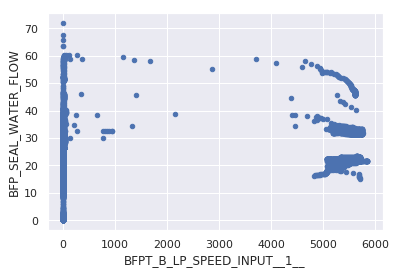

In [9]:
# Trying to get some idea of data using graphs.
data.plot(x= "BFPT_B_LP_SPEED_INPUT__1__", y = "BFP_SEAL_WATER_FLOW",kind='scatter')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


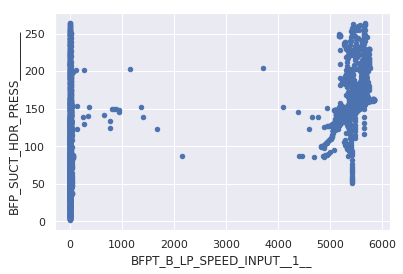

In [10]:
data.plot(x= "BFPT_B_LP_SPEED_INPUT__1__", y = "BFP_SUCT_HDR_PRESS________",kind="scatter")

In [11]:
# Considering data only when pump is in its normal running state, details explained in report.
df2 = data.loc[data["BFPT_B_LP_SPEED_INPUT__1__"] > 4000]
df2

Unnamed: 0  BFP_SEAL_WATER_FLOW  BFP_SUCT_HDR_PRESS________  \
6361   5/23/98 2:05                38.51                       86.99   
6362   5/23/98 2:10                38.32                       86.54   
6363   5/23/98 2:15                38.12                       86.09   
6364   5/23/98 2:20                37.93                       86.32   
6365   5/23/98 2:25                37.74                       87.17   
6366   5/23/98 2:30                37.55                       88.01   
6367   5/23/98 2:35                37.35                       88.86   
6368   5/23/98 2:40                37.16                       90.27   
6369   5/23/98 2:45                36.97                       92.61   
6370   5/23/98 2:50                36.78                       94.94   
6371   5/23/98 2:55                36.58                       97.28   
6372   5/23/98 3:00                36.39                       99.61   
6373   5/23/98 3:05                16.33                      100.42   
6374   5/23/98 3:10                16.38                      100.36   
6375   5/23/98 3:15                16.43                      100.30   
6376   5/23/98 3:20                16.48                      100.86   
6377   5/23/98 3:25                16.53                      101.90   
6378   5/23/98 3:30                16.58                      102.95   
6379   5/23/98 3:35                16.63                      104.00   
6380   5/23/98 3:40                16.68                      105.05   
6381   5/23/98 3:45                16.72                      106.09   
6382   5/23/98 3:50                16.77                      107.14   
6383   5/23/98 3:55                16.82                      108.19   
6384   5/23/98 4:00                16.87                      109.23   
6385   5/23/98 4:05                16.92                      110.28   
6386   5/23/98 4:10                16.97                      111.56   
6387   5/23/98 4:15                17.02                      112.85   
6388   5/23/98 4:20                17.07                      114.15   
6389   5/23/98 4:25                17.12                      115.44   
6390   5/23/98 4:30                17.16                      117.35   
...             ...                  ...                         ...   
12436  6/13/98 4:20                33.29                      127.78   
12437  6/13/98 4:25                33.29                      127.96   
12438  6/13/98 4:30                33.29                      128.13   
12439  6/13/98 4:35                33.29                      128.30   
12440  6/13/98 4:40                33.29                      128.48   
12441  6/13/98 4:45                33.29                      128.65   
12442  6/13/98 4:50                33.29                      128.82   
12443  6/13/98 4:55                33.29                      129.00   
12444  6/13/98 5:00                33.29                      129.17   
12445  6/13/98 5:05                33.29                      130.92   
12446  6/13/98 5:10                33.29                      134.68   
12447  6/13/98 5:15                33.29                      138.01   
12448  6/13/98 5:20                33.29                      139.66   
12449  6/13/98 5:25                33.29                      141.32   
12450  6/13/98 5:30                33.29                      142.97   
12451  6/13/98 5:35                33.29                      144.62   
12452  6/13/98 5:40                33.29                      146.27   
12453  6/13/98 5:45                33.29                      147.92   
12454  6/13/98 5:50                33.29                      153.10   
12455  6/13/98 5:55                33.29                      158.85   
12456  6/13/98 6:00                33.30                      164.53   
12457  6/13/98 6:05                33.32                      167.23   
12458  6/13/98 6:10                33.34                      169.94   
12459  6/13/98 6:15                33.36         

In [12]:
# Removing the column with time data
df2 = df2.drop(columns=df2.columns[0])
df2

BFP_SEAL_WATER_FLOW  BFP_SUCT_HDR_PRESS________  \
6361                 38.51                       86.99   
6362                 38.32                       86.54   
6363                 38.12                       86.09   
6364                 37.93                       86.32   
6365                 37.74                       87.17   
6366                 37.55                       88.01   
6367                 37.35                       88.86   
6368                 37.16                       90.27   
6369                 36.97                       92.61   
6370                 36.78                       94.94   
6371                 36.58                       97.28   
6372                 36.39                       99.61   
6373                 16.33                      100.42   
6374                 16.38                      100.36   
6375                 16.43                      100.30   
6376                 16.48                      100.86   
6377                 16.53                      101.90   
6378                 16.58                      102.95   
6379                 16.63                      104.00   
6380                 16.68                      105.05   
6381                 16.72                      106.09   
6382                 16.77                      107.14   
6383                 16.82                      108.19   
6384                 16.87                      109.23   
6385                 16.92                      110.28   
6386                 16.97                      111.56   
6387                 17.02                      112.85   
6388                 17.07                      114.15   
6389                 17.12                      115.44   
6390                 17.16                      117.35   
...                    ...                         ...   
12436                33.29                      127.78   
12437                33.29                      127.96   
12438                33.29                      128.13   
12439                33.29                      128.30   
12440                33.29                      128.48   
12441                33.29                      128.65   
12442                33.29                      128.82   
12443                33.29                      129.00   
12444                33.29                      129.17   
12445                33.29                      130.92   
12446                33.29                      134.68   
12447                33.29                      138.01   
12448                33.29                      139.66   
12449                33.29                      141.32   
12450                33.29                      142.97   
12451                33.29                      144.62   
12452                33.29                      146.27   
12453                33.29                      147.92   
12454                33.29                      153.10   
12455                33.29                      158.85   
12456                33.30                      164.53   
12457                33.32                      167.23   
12458                33.34                      169.94   
12459                33.36                      172.64   
12460                33.38                      175.34   
12461                33.40                      178.04   
12462                33.42                      180.74   
12463                33.44                      183.44   
12464                33.46                      186.14   
12465                34.78                      188.84   

       AUX_CDSR_2B_PRESS_________  BFP_SUCTION_HDR_TEMP______  \
6361                         5.39                      277.09   
6362                         5.62                      277.79   
6363                         5.72                      278.49   
6364                         5.81                      279.19   
6365                         5.91                      279.89   
6366                

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6788951668>,
      dtype=object)

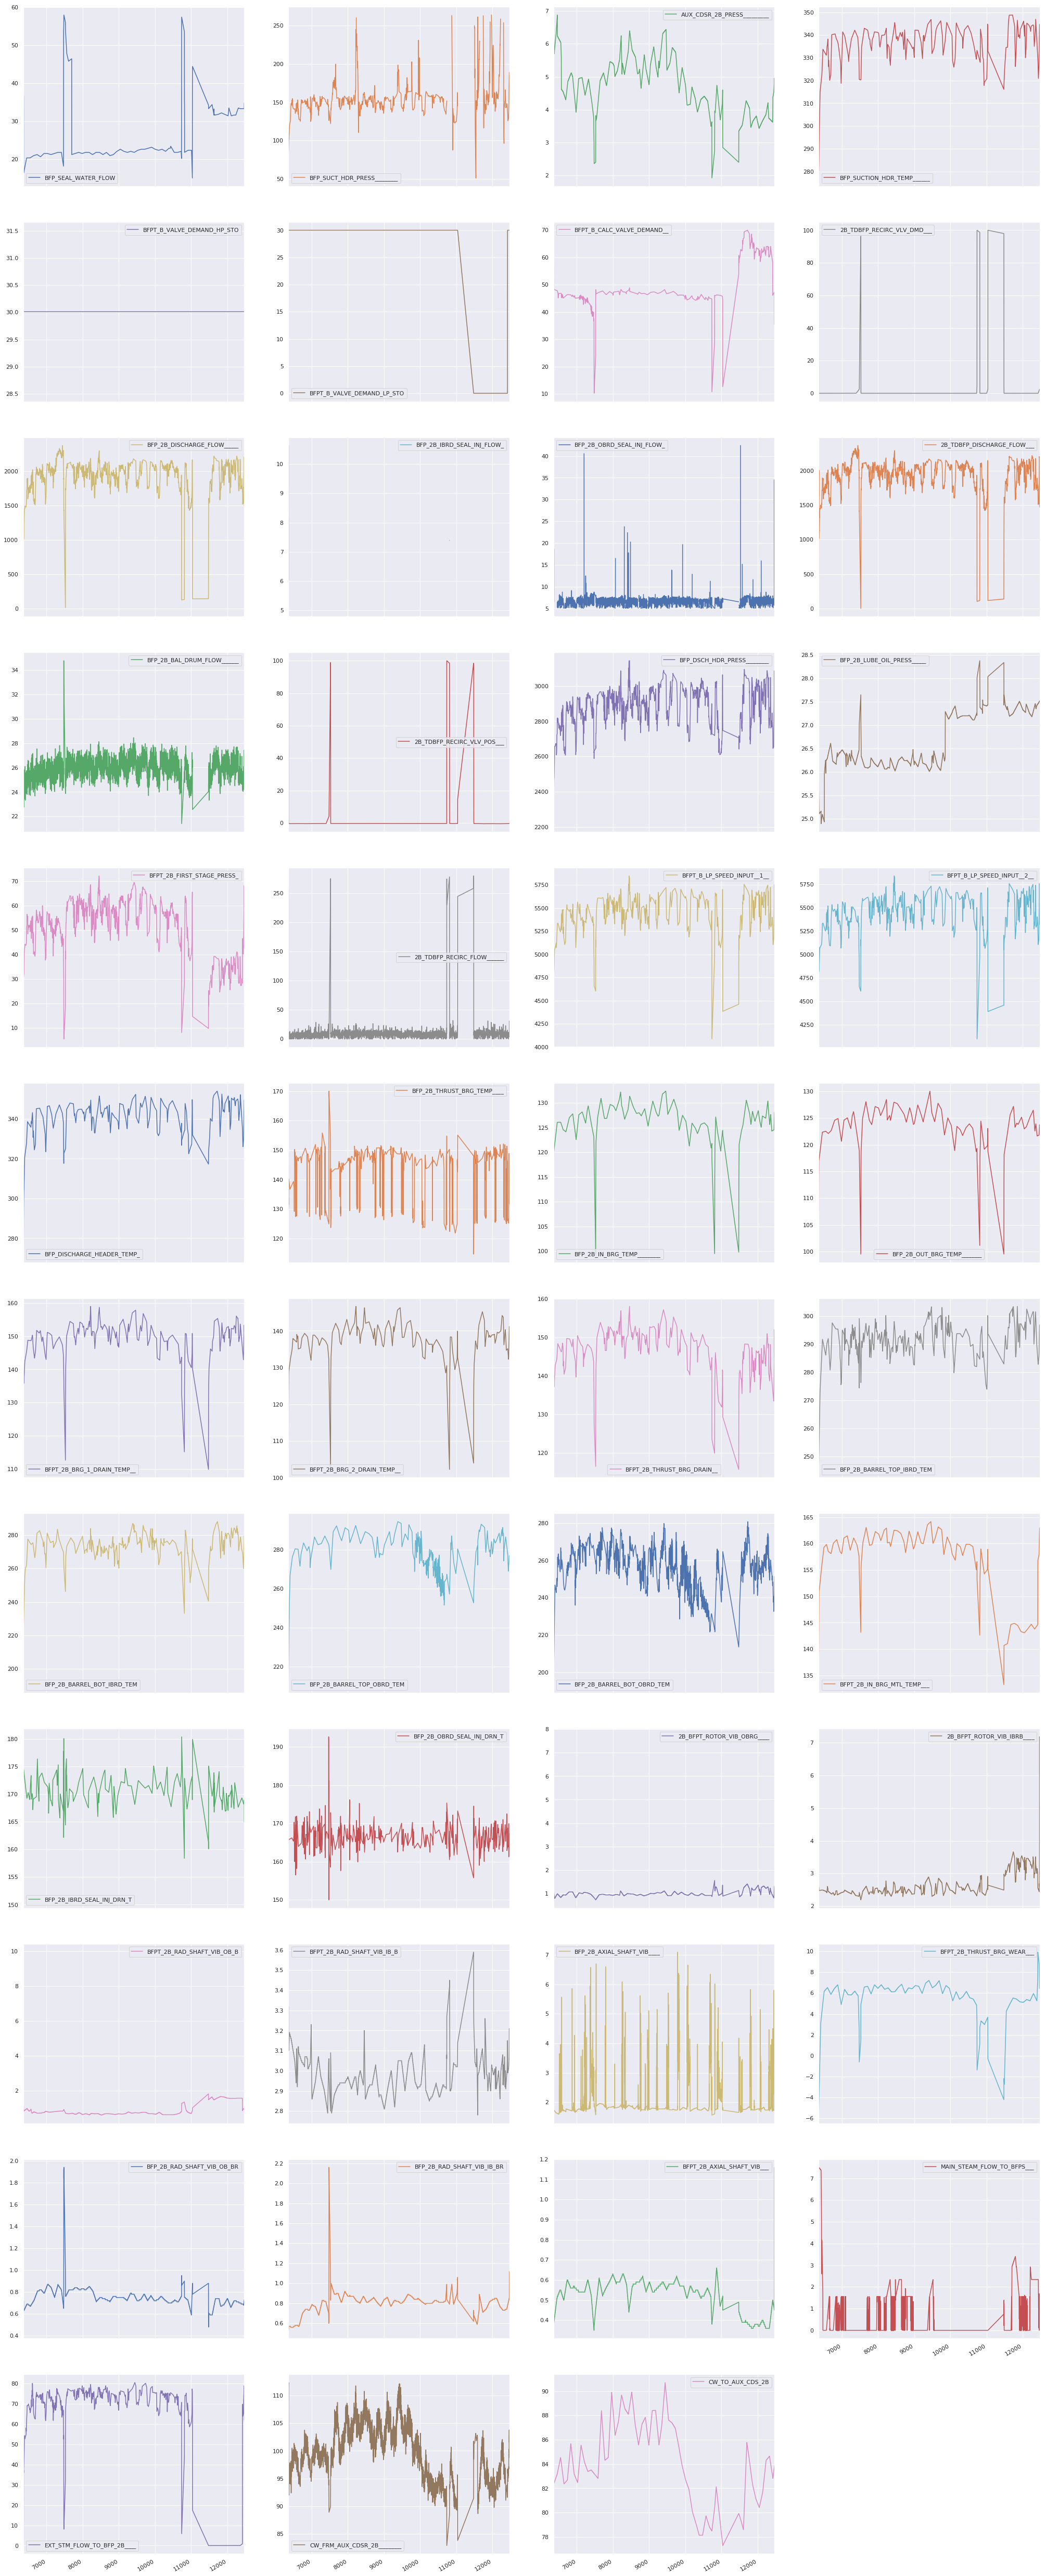

In [13]:
# Getting some idea of the sensor data distribution for all the sensors
df2.plot(subplots=True,layout=(12,4),figsize = (35,100))

In [14]:
df2.describe()

BFP_SEAL_WATER_FLOW  BFP_SUCT_HDR_PRESS________  \
count          5549.000000                 5242.000000   
mean             24.561719                  153.582509   
std               6.138030                   19.372690   
min              15.000000                   51.310000   
25%              21.480000                  144.692500   
50%              21.940000                  151.865000   
75%              22.860000                  158.057500   
max              57.990000                  263.620000   

       AUX_CDSR_2B_PRESS_________  BFP_SUCTION_HDR_TEMP______  \
count                 5549.000000                 5549.000000   
mean                     4.775720                  337.601007   
std                      0.781898                    7.183442   
min                      1.920000                  277.090000   
25%                      4.150000                  334.510000   
50%                      4.810000                  339.420000   
75%                      5.340000                  342.150000   
max                      6.880000                  348.830000   

       BFPT_B_VALVE_DEMAND_HP_STO  BFPT_B_VALVE_DEMAND_LP_STO  \
count                5.549000e+03                 5549.000000   
mean                 3.001000e+01                   24.947942   
std                  3.553034e-15                   11.238803   
min                  3.001000e+01                    0.000000   
25%                  3.001000e+01                   30.010000   
50%                  3.001000e+01                   30.010000   
75%                  3.001000e+01                   30.010000   
max                  3.001000e+01                   30.010000   

       BFPT_B_CALC_VALVE_DEMAND__  2B_TDBFP_RECIRC_VLV_DMD___  \
count                 5549.000000                 5549.000000   
mean                    49.165399                    0.235435   
std                      6.974285                    4.275322   
min                     10.220000                    0.000000   
25%                     45.830000                    0.000000   
50%                     46.830000                    0.000000   
75%                     47.520000                    0.000000   
max                     69.960000                   99.980000   

       BFP_2B_DISCHARGE_FLOW_____  BFP_2B_IBRD_SEAL_INJ_FLOW_  ...  \
count                 5549.000000                   10.000000  ...   
mean                  1958.823871                    7.592000  ...   
std                    201.278250                    1.835404  ...   
min                      0.000000                    5.060000  ...   
25%                   1853.390000                    6.180000  ...   
50%                   2002.930000                    7.390000  ...   
75%                   2091.020000                    8.615000  ...   
max                   2373.160000                   10.640000  ...   

       BFPT_2B_RAD_SHAFT_VIB_IB_B  BFP_2B_AXIAL_SHAFT_VIB____  \
count                 5547.000000                 5549.000000   
mean                     2.968680                    2.008270   
std                      0.080985                    0.654909   
min                      2.780000                    1.560000   
25%                      2.920000                    1.740000   
50%                      2.960000                    1.780000   
75%                      3.020000                    1.850000   
max                      3.590000                    7.100000   

       BFPT_2B_THRUST_BRG_WEAR___  BFP_2B_RAD_SHAFT_VIB_OB_BR  \
count                 5549.000000                 5549.000000   
mean                     5.798227                    0.748562   
std                      1.373146                    0.064616   
min                     -5.690000                    0.450000   
25%                      5.460000                    0.720000   
50%                      6.110000                    0.740000   
75%                      6.510000                    0

In [16]:
# Dropping columns with more than 50% missing data, only one column will get dropped at this step.
cols = df2.columns[df2.isnull().mean()>0.5]
df2=df2.drop(cols, axis=1)
df2

BFP_SEAL_WATER_FLOW  BFP_SUCT_HDR_PRESS________  \
6361                 38.51                       86.99   
6362                 38.32                       86.54   
6363                 38.12                       86.09   
6364                 37.93                       86.32   
6365                 37.74                       87.17   
6366                 37.55                       88.01   
6367                 37.35                       88.86   
6368                 37.16                       90.27   
6369                 36.97                       92.61   
6370                 36.78                       94.94   
6371                 36.58                       97.28   
6372                 36.39                       99.61   
6373                 16.33                      100.42   
6374                 16.38                      100.36   
6375                 16.43                      100.30   
6376                 16.48                      100.86   
6377                 16.53                      101.90   
6378                 16.58                      102.95   
6379                 16.63                      104.00   
6380                 16.68                      105.05   
6381                 16.72                      106.09   
6382                 16.77                      107.14   
6383                 16.82                      108.19   
6384                 16.87                      109.23   
6385                 16.92                      110.28   
6386                 16.97                      111.56   
6387                 17.02                      112.85   
6388                 17.07                      114.15   
6389                 17.12                      115.44   
6390                 17.16                      117.35   
...                    ...                         ...   
12436                33.29                      127.78   
12437                33.29                      127.96   
12438                33.29                      128.13   
12439                33.29                      128.30   
12440                33.29                      128.48   
12441                33.29                      128.65   
12442                33.29                      128.82   
12443                33.29                      129.00   
12444                33.29                      129.17   
12445                33.29                      130.92   
12446                33.29                      134.68   
12447                33.29                      138.01   
12448                33.29                      139.66   
12449                33.29                      141.32   
12450                33.29                      142.97   
12451                33.29                      144.62   
12452                33.29                      146.27   
12453                33.29                      147.92   
12454                33.29                      153.10   
12455                33.29                      158.85   
12456                33.30                      164.53   
12457                33.32                      167.23   
12458                33.34                      169.94   
12459                33.36                      172.64   
12460                33.38                      175.34   
12461                33.40                      178.04   
12462                33.42                      180.74   
12463                33.44                      183.44   
12464                33.46                      186.14   
12465                34.78                      188.84   

       AUX_CDSR_2B_PRESS_________  BFP_SUCTION_HDR_TEMP______  \
6361                         5.39                      277.09   
6362                         5.62                      277.79   
6363                         5.72                      278.49   
6364                         5.81                      279.19   
6365                         5.91                      279.89   
6366                

In [17]:
# Checking how many data points is present in each column.
df2.count()

BFP_SEAL_WATER_FLOW           5549
BFP_SUCT_HDR_PRESS________    5242
AUX_CDSR_2B_PRESS_________    5549
BFP_SUCTION_HDR_TEMP______    5549
BFPT_B_VALVE_DEMAND_HP_STO    5549
BFPT_B_VALVE_DEMAND_LP_STO    5549
BFPT_B_CALC_VALVE_DEMAND__    5549
2B_TDBFP_RECIRC_VLV_DMD___    5549
BFP_2B_DISCHARGE_FLOW_____    5549
BFP_2B_OBRD_SEAL_INJ_FLOW_    4243
2B_TDBFP_DISCHARGE_FLOW___    5549
BFP_2B_BAL_DRUM_FLOW______    5549
2B_TDBFP_RECIRC_VLV_POS___    5549
BFP_DSCH_HDR_PRESS________    5549
BFP_2B_LUBE_OIL_PRESS_____    5549
BFPT_2B_FIRST_STAGE_PRESS_    5549
2B_TDBFP_RECIRC_FLOW______    5549
BFPT_B_LP_SPEED_INPUT__1__    5549
BFPT_B_LP_SPEED_INPUT__2__    5549
BFP_DISCHARGE_HEADER_TEMP_    5549
BFP_2B_THRUST_BRG_TEMP____    5549
BFP_2B_IN_BRG_TEMP________    5549
BFP_2B_OUT_BRG_TEMP_______    5549
BFPT_2B_BRG_1_DRAIN_TEMP__    5549
BFPT_2B_BRG_2_DRAIN_TEMP__    5549
BFPT_2B_THRUST_BRG_DRAIN__    5549
BFP_2B_BARREL_TOP_IBRD_TEM    5549
BFP_2B_BARREL_BOT_IBRD_TEM    5549
BFP_2B_BARREL_TOP_OB

In [18]:
#Detecting columns with missing values.
df2.count() != 5549

BFP_SEAL_WATER_FLOW           False
BFP_SUCT_HDR_PRESS________     True
AUX_CDSR_2B_PRESS_________    False
BFP_SUCTION_HDR_TEMP______    False
BFPT_B_VALVE_DEMAND_HP_STO    False
BFPT_B_VALVE_DEMAND_LP_STO    False
BFPT_B_CALC_VALVE_DEMAND__    False
2B_TDBFP_RECIRC_VLV_DMD___    False
BFP_2B_DISCHARGE_FLOW_____    False
BFP_2B_OBRD_SEAL_INJ_FLOW_     True
2B_TDBFP_DISCHARGE_FLOW___    False
BFP_2B_BAL_DRUM_FLOW______    False
2B_TDBFP_RECIRC_VLV_POS___    False
BFP_DSCH_HDR_PRESS________    False
BFP_2B_LUBE_OIL_PRESS_____    False
BFPT_2B_FIRST_STAGE_PRESS_    False
2B_TDBFP_RECIRC_FLOW______    False
BFPT_B_LP_SPEED_INPUT__1__    False
BFPT_B_LP_SPEED_INPUT__2__    False
BFP_DISCHARGE_HEADER_TEMP_    False
BFP_2B_THRUST_BRG_TEMP____    False
BFP_2B_IN_BRG_TEMP________    False
BFP_2B_OUT_BRG_TEMP_______    False
BFPT_2B_BRG_1_DRAIN_TEMP__    False
BFPT_2B_BRG_2_DRAIN_TEMP__    False
BFPT_2B_THRUST_BRG_DRAIN__    False
BFP_2B_BARREL_TOP_IBRD_TEM    False
BFP_2B_BARREL_BOT_IBRD_TEM  

In [19]:
# Getting an idea of the missing values
df2[df2['BFP_SUCT_HDR_PRESS________'].isnull()]    

BFP_SEAL_WATER_FLOW  BFP_SUCT_HDR_PRESS________  \
8224                 21.50                         NaN   
8225                 21.49                         NaN   
8226                 21.49                         NaN   
8227                 21.48                         NaN   
8228                 21.48                         NaN   
8229                 21.47                         NaN   
8230                 21.46                         NaN   
8231                 21.46                         NaN   
8232                 21.45                         NaN   
8233                 21.45                         NaN   
8234                 21.44                         NaN   
8235                 21.43                         NaN   
10812                53.57                         NaN   
10813                35.60                         NaN   
10814                35.18                         NaN   
10815                34.76                         NaN   
10816                34.34                         NaN   
10817                21.77                         NaN   
10818                21.77                         NaN   
10819                21.78                         NaN   
10820                21.78                         NaN   
10821                21.79                         NaN   
10822                21.80                         NaN   
10823                21.80                         NaN   
10824                21.81                         NaN   
10825                21.81                         NaN   
10826                21.82                         NaN   
10827                21.82                         NaN   
10828                21.83                         NaN   
10829                21.84                         NaN   
...                    ...                         ...   
12275                32.75                         NaN   
12276                32.78                         NaN   
12277                32.80                         NaN   
12278                32.83                         NaN   
12279                32.86                         NaN   
12280                32.89                         NaN   
12281                32.91                         NaN   
12282                32.94                         NaN   
12283                32.97                         NaN   
12284                33.00                         NaN   
12285                33.02                         NaN   
12286                33.05                         NaN   
12287                33.08                         NaN   
12288                33.10                         NaN   
12289                33.13                         NaN   
12290                33.16                         NaN   
12291                33.19                         NaN   
12292                33.21                         NaN   
12293                33.24                         NaN   
12294                33.27                         NaN   
12295                33.30                         NaN   
12296                33.32                         NaN   
12297                33.35                         NaN   
12298                33.38                         NaN   
12299                33.41                         NaN   
12300                33.43                         NaN   
12301                33.46                         NaN   
12302                33.47                         NaN   
12303                33.47                         NaN   
12304                33.46                         NaN   

       AUX_CDSR_2B_PRESS_________  BFP_SUCTION_HDR_TEMP______  \
8224                         6.16                      342.63   
8225                         6.17                      342.68   
8226                         6.19                      342.74   
8227                         6.21                      342.80   
8228                         6.23                      342.86   
8229                

In [20]:
import random
#Replacing missing values with random numbers in column range
def replace_missing_values(df, column_name):
    maximum = df[column_name].max()
    minimum = df[column_name].min()
    df[column_name] = df[column_name].fillna(random.uniform(minimum,maximum))
    return maximum, minimum
# This was tried but in final results this method was not used.

In [21]:
#Replacing missing values using interpolation
df3 = df2.interpolate(method = "values")

In [22]:
df3.count() != 5549

BFP_SEAL_WATER_FLOW           False
BFP_SUCT_HDR_PRESS________    False
AUX_CDSR_2B_PRESS_________    False
BFP_SUCTION_HDR_TEMP______    False
BFPT_B_VALVE_DEMAND_HP_STO    False
BFPT_B_VALVE_DEMAND_LP_STO    False
BFPT_B_CALC_VALVE_DEMAND__    False
2B_TDBFP_RECIRC_VLV_DMD___    False
BFP_2B_DISCHARGE_FLOW_____    False
BFP_2B_OBRD_SEAL_INJ_FLOW_     True
2B_TDBFP_DISCHARGE_FLOW___    False
BFP_2B_BAL_DRUM_FLOW______    False
2B_TDBFP_RECIRC_VLV_POS___    False
BFP_DSCH_HDR_PRESS________    False
BFP_2B_LUBE_OIL_PRESS_____    False
BFPT_2B_FIRST_STAGE_PRESS_    False
2B_TDBFP_RECIRC_FLOW______    False
BFPT_B_LP_SPEED_INPUT__1__    False
BFPT_B_LP_SPEED_INPUT__2__    False
BFP_DISCHARGE_HEADER_TEMP_    False
BFP_2B_THRUST_BRG_TEMP____    False
BFP_2B_IN_BRG_TEMP________    False
BFP_2B_OUT_BRG_TEMP_______    False
BFPT_2B_BRG_1_DRAIN_TEMP__    False
BFPT_2B_BRG_2_DRAIN_TEMP__    False
BFPT_2B_THRUST_BRG_DRAIN__    False
BFP_2B_BARREL_TOP_IBRD_TEM    False
BFP_2B_BARREL_BOT_IBRD_TEM  

In [23]:
#replace_missing_values(df3,'BFP_2B_OBRD_SEAL_INJ_FLOW_') as some manual intervention is needed for this particular row as can be seen in the above step.
df3['BFP_2B_OBRD_SEAL_INJ_FLOW_'] = df3['BFP_2B_OBRD_SEAL_INJ_FLOW_'].fillna(random.uniform(6.45,7.65))

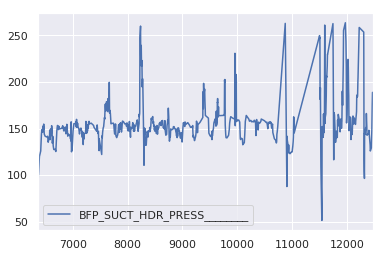

In [24]:
df3.plot(y='BFP_SUCT_HDR_PRESS________')

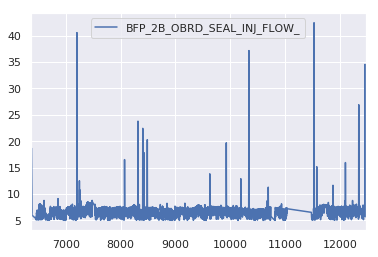

In [25]:
df3.plot(y = 'BFP_2B_OBRD_SEAL_INJ_FLOW_')

In [26]:
df3.count()

BFP_SEAL_WATER_FLOW           5549
BFP_SUCT_HDR_PRESS________    5549
AUX_CDSR_2B_PRESS_________    5549
BFP_SUCTION_HDR_TEMP______    5549
BFPT_B_VALVE_DEMAND_HP_STO    5549
BFPT_B_VALVE_DEMAND_LP_STO    5549
BFPT_B_CALC_VALVE_DEMAND__    5549
2B_TDBFP_RECIRC_VLV_DMD___    5549
BFP_2B_DISCHARGE_FLOW_____    5549
BFP_2B_OBRD_SEAL_INJ_FLOW_    5549
2B_TDBFP_DISCHARGE_FLOW___    5549
BFP_2B_BAL_DRUM_FLOW______    5549
2B_TDBFP_RECIRC_VLV_POS___    5549
BFP_DSCH_HDR_PRESS________    5549
BFP_2B_LUBE_OIL_PRESS_____    5549
BFPT_2B_FIRST_STAGE_PRESS_    5549
2B_TDBFP_RECIRC_FLOW______    5549
BFPT_B_LP_SPEED_INPUT__1__    5549
BFPT_B_LP_SPEED_INPUT__2__    5549
BFP_DISCHARGE_HEADER_TEMP_    5549
BFP_2B_THRUST_BRG_TEMP____    5549
BFP_2B_IN_BRG_TEMP________    5549
BFP_2B_OUT_BRG_TEMP_______    5549
BFPT_2B_BRG_1_DRAIN_TEMP__    5549
BFPT_2B_BRG_2_DRAIN_TEMP__    5549
BFPT_2B_THRUST_BRG_DRAIN__    5549
BFP_2B_BARREL_TOP_IBRD_TEM    5549
BFP_2B_BARREL_BOT_IBRD_TEM    5549
BFP_2B_BARREL_TOP_OB

In [27]:
# Making sure that no nan values are left
df3.count()!=5549

BFP_SEAL_WATER_FLOW           False
BFP_SUCT_HDR_PRESS________    False
AUX_CDSR_2B_PRESS_________    False
BFP_SUCTION_HDR_TEMP______    False
BFPT_B_VALVE_DEMAND_HP_STO    False
BFPT_B_VALVE_DEMAND_LP_STO    False
BFPT_B_CALC_VALVE_DEMAND__    False
2B_TDBFP_RECIRC_VLV_DMD___    False
BFP_2B_DISCHARGE_FLOW_____    False
BFP_2B_OBRD_SEAL_INJ_FLOW_    False
2B_TDBFP_DISCHARGE_FLOW___    False
BFP_2B_BAL_DRUM_FLOW______    False
2B_TDBFP_RECIRC_VLV_POS___    False
BFP_DSCH_HDR_PRESS________    False
BFP_2B_LUBE_OIL_PRESS_____    False
BFPT_2B_FIRST_STAGE_PRESS_    False
2B_TDBFP_RECIRC_FLOW______    False
BFPT_B_LP_SPEED_INPUT__1__    False
BFPT_B_LP_SPEED_INPUT__2__    False
BFP_DISCHARGE_HEADER_TEMP_    False
BFP_2B_THRUST_BRG_TEMP____    False
BFP_2B_IN_BRG_TEMP________    False
BFP_2B_OUT_BRG_TEMP_______    False
BFPT_2B_BRG_1_DRAIN_TEMP__    False
BFPT_2B_BRG_2_DRAIN_TEMP__    False
BFPT_2B_THRUST_BRG_DRAIN__    False
BFP_2B_BARREL_TOP_IBRD_TEM    False
BFP_2B_BARREL_BOT_IBRD_TEM  

In [28]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

In [29]:
#Scaling the data to one particular range so that further processes can be done easily. Well explained in report.
X_train = pd.DataFrame(scaler.fit_transform(df3), 
                              columns=df3.columns, 
                              index=df3.index)

In [30]:
X_train.head()

BFP_SEAL_WATER_FLOW  BFP_SUCT_HDR_PRESS________  \
6361             0.546871                    0.168056   
6362             0.542452                    0.165937   
6363             0.537799                    0.163817   
6364             0.533380                    0.164900   
6365             0.528960                    0.168904   

      AUX_CDSR_2B_PRESS_________  BFP_SUCTION_HDR_TEMP______  \
6361                    0.699597                    0.000000   
6362                    0.745968                    0.009757   
6363                    0.766129                    0.019515   
6364                    0.784274                    0.029272   
6365                    0.804435                    0.039030   

      BFPT_B_VALVE_DEMAND_HP_STO  BFPT_B_VALVE_DEMAND_LP_STO  \
6361                         0.0                         1.0   
6362                         0.0                         1.0   
6363                         0.0                         1.0   
6364                         0.0                         1.0   
6365                         0.0                         1.0   

      BFPT_B_CALC_VALVE_DEMAND__  2B_TDBFP_RECIRC_VLV_DMD___  \
6361                    0.664881                         1.0   
6362                    0.667727                         1.0   
6363                    0.696686                         1.0   
6364                    0.793773                         0.0   
6365                    0.757449                         0.0   

      BFP_2B_DISCHARGE_FLOW_____  BFP_2B_OBRD_SEAL_INJ_FLOW_  ...  \
6361                    0.000000                     0.04925  ...   
6362                    0.000000                     0.04925  ...   
6363                    0.034928                     0.04925  ...   
6364                    0.428450                     0.04925  ...   
6365                    0.671682                     0.04925  ...   

      BFPT_2B_RAD_SHAFT_VIB_IB_B  BFP_2B_AXIAL_SHAFT_VIB____  \
6361                    0.506173                    0.003610   
6362                    0.592593                    0.005415   
6363                    0.666667                    0.009025   
6364                    0.666667                    0.010830   
6365                    0.629630                    0.014440   

      BFPT_2B_THRUST_BRG_WEAR___  BFP_2B_RAD_SHAFT_VIB_OB_BR  \
6361                    0.000000                    0.140940   
6362                    0.009603                    0.147651   
6363                    0.019846                    0.033557   
6364                    0.030090                    0.000000   
6365                    0.039693                    0.026846   

      BFP_2B_RAD_SHAFT_VIB_IB_BR  BFPT_2B_AXIAL_SHAFT_VIB___  \
6361                    0.079755                    0.024691   
6362                    0.042945                    0.024691   
6363                    0.006135                    0.037037   
6364                    0.000000                    0.037037   
6365                    0.006135                    0.037037   

      MAIN_STEAM_FLOW_TO_BFPS___  EXT_STM_FLOW_TO_BFP_2B____  \
6361                         1.0                    0.378938   
6362                         1.0                    0.351898   
6363                         1.0                    0.274498   
6364                         1.0                    0.062267   
6365                         1.0                    0.011288   

      CW_FRM_AUX_CDSR_2B________  CW_TO_AUX_CDS_2B  
6361                    0.778722          0.380030  
6362                    0.849082          0.380030  
6363                    0.919443          0.379285  
6364                    0.958872          0.379285  
6365                    0.967029          0.379285  

[5 rows x 46 columns]

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver= 'full')
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = X_train.index

In [32]:
def cov_matrix(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")

In [33]:
def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md

In [34]:
def MD_detectOutliers(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    outliers = []
    for i in range(len(dist)):
        if dist[i] >= threshold:
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

In [35]:
def MD_threshold(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold

In [36]:
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

In [37]:
data_train = np.array(X_train_PCA.values)

In [38]:
cov_matrix, inv_cov_matrix  = cov_matrix(data_train)

In [39]:
mean_distr = data_train.mean(axis=0)

In [40]:
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
threshold = MD_threshold(dist_train, extreme = True)

(0.0, 15)

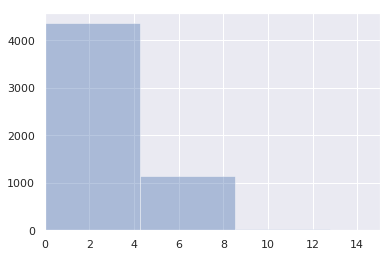

In [41]:
plt.figure()
sns.distplot(np.square(dist_train),
             bins = 10, 
             kde= False);
plt.xlim([0.0,15])

Text(0.5, 0, 'Mahalanobis dist')

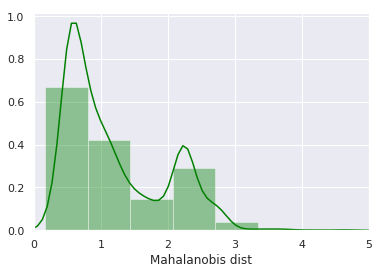

In [42]:
plt.figure()
sns.distplot(dist_train,
             bins = 10, 
             kde= True, 
            color = 'green');
plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')

In [43]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index
anomaly = pd.DataFrame()
anomaly['Mob dist']= dist_train
anomaly['Thresh'] = threshold
# If Mob dist above threshold: Flag as anomaly
anomaly['Anomaly'] = anomaly['Mob dist'] > anomaly['Thresh']
anomaly.index = X_train_PCA.index
anomaly.head()

Mob dist    Thresh  Anomaly
6361  6.525370  3.601182     True
6362  6.017813  3.601182     True
6363  5.426259  3.601182     True
6364  4.773535  3.601182     True
6365  4.310063  3.601182     True

### Important : In the above table, 6361 row number corresponds to the 6363 row number in the excel file as the
### count in pandas df starts with 0, while from 1 in excel and the first row in excel is for the column names
### which is not the case here, so any index here can be found in excel file using index + 2 ###

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


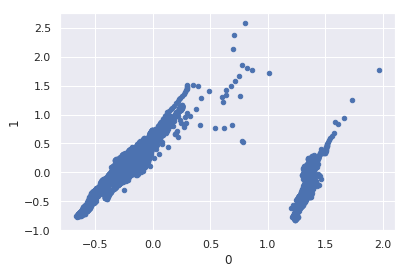

In [44]:
X_train_PCA.head()
X_train_PCA.plot(x=0,y=1,kind='scatter')

### DEEP LEARNING METHOD BELOW  ###

In [46]:
seed(47)
tensorflow.random.set_seed(47)
act_func = 'relu'

# Input layer:
model=Sequential()
# First hidden layer, connected to input vector X. 
model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l2(0.0),
                input_shape=(X_train.shape[1],)
               )
         )
#model.add(Dense(5,activation=act_func,
               #kernel_initializer = 'glorot_uniform'))


model.add(Dense(2,activation=act_func,
                kernel_initializer='glorot_uniform'))
#model.add(Dense(5,activation=act_func,
               #kernel_initializer = 'glorot_uniform'))
model.add(Dense(10,activation=act_func,
                kernel_initializer='glorot_uniform'))

model.add(Dense(X_train.shape[1],
                kernel_initializer='glorot_uniform'))

model.compile(loss='mse',optimizer='adam')

# Train model for 100 epochs, batch size of 10: 
NUM_EPOCHS=100
BATCH_SIZE=10

In [47]:
history=model.fit(np.array(X_train),np.array(X_train),
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.05,
                  verbose = 1)

Train on 5271 samples, validate on 278 samples
Epoch 1/100
5271/5271 [==============================] - 1s 112us/step - loss: 0.0558 - val_loss: 0.0354
Epoch 2/100
5271/5271 [==============================] - 1s 96us/step - loss: 0.0096 - val_loss: 0.0143
Epoch 3/100
5271/5271 [==============================] - 1s 97us/step - loss: 0.0061 - val_loss: 0.0077
Epoch 4/100
5271/5271 [==============================] - 1s 96us/step - loss: 0.0057 - val_loss: 0.0076
Epoch 5/100
5271/5271 [==============================] - 1s 107us/step - loss: 0.0056 - val_loss: 0.0072
Epoch 6/100
5271/5271 [==============================] - 1s 98us/step - loss: 0.0055 - val_loss: 0.0067
Epoch 7/100
5271/5271 [==============================] - 1s 110us/step - loss: 0.0053 - val_loss: 0.0071
Epoch 8/100
5271/5271 [==============================] - 1s 105us/step - loss: 0.0052 - val_loss: 0.0066
Epoch 9/100
5271/5271 [==============================] - 1s 108us/step - loss: 0.0051 - val_loss: 0.0062
Epoch 10/100

5271/5271 [==============================] - 1s 110us/step - loss: 0.0029 - val_loss: 0.0057
Epoch 79/100
5271/5271 [==============================] - 1s 117us/step - loss: 0.0029 - val_loss: 0.0057
Epoch 80/100
5271/5271 [==============================] - 1s 120us/step - loss: 0.0029 - val_loss: 0.0055
Epoch 81/100
5271/5271 [==============================] - 1s 96us/step - loss: 0.0029 - val_loss: 0.0055
Epoch 82/100
5271/5271 [==============================] - 1s 100us/step - loss: 0.0029 - val_loss: 0.0054
Epoch 83/100
5271/5271 [==============================] - 1s 104us/step - loss: 0.0029 - val_loss: 0.0055
Epoch 84/100
5271/5271 [==============================] - 1s 105us/step - loss: 0.0029 - val_loss: 0.0056
Epoch 85/100
5271/5271 [==============================] - 1s 102us/step - loss: 0.0029 - val_loss: 0.0057
Epoch 86/100
5271/5271 [==============================] - 1s 99us/step - loss: 0.0029 - val_loss: 0.0054
Epoch 87/100
5271/5271 [==============================] - 1s 

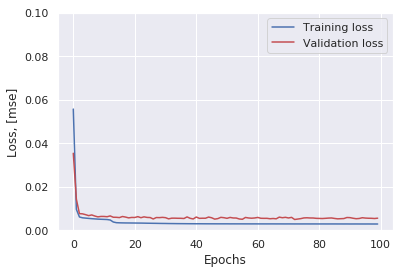

In [48]:
plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.ylim([0,.1])
plt.show()

(0.0, 0.5)

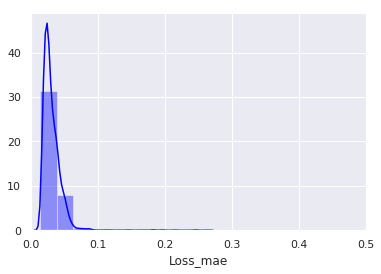

In [49]:
X_pred = model.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_train.columns)
X_pred.index = X_train.index

scored = pd.DataFrame(index=X_train.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
plt.figure()
sns.distplot(scored['Loss_mae'],
             bins = 10, 
             kde= True,
            color = 'blue');
plt.xlim([0.0,.5])

In [55]:
X_pred = model.predict(np.array(X_train))
X_pred = pd.DataFrame(X_pred, 
                      columns=X_train.columns)
X_pred.index = X_train.index

scored = pd.DataFrame(index=X_train.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train), axis = 1)
scored['Threshold'] = 0.1
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

Loss_mae  Threshold  Anomaly
6361  0.180306        0.1     True
6362  0.146576        0.1     True
6363  0.132161        0.1     True
6364  0.103664        0.1     True
6365  0.082198        0.1    False

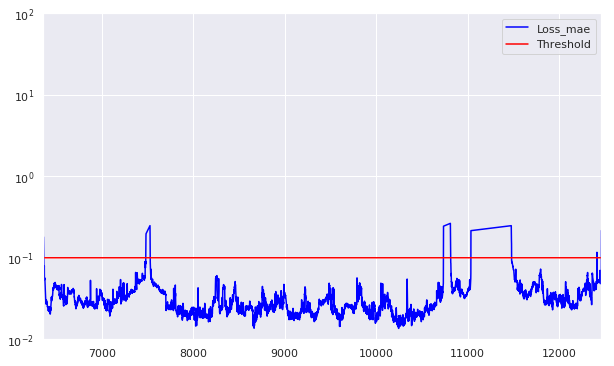

In [56]:
scored.plot(logy=True,  figsize = (10,6), ylim = [1e-2,1e2], color = ['blue','red'])

In [52]:
# Writing to a csv file
scored.to_csv('Anomaly_autoencoder.csv')

### Important : In the above table, 6361 row number corresponds to the 6363 row number in the excel file as the
### count in pandas df starts with 0, while from 1 in excel and the first row in excel is for the column names
### which is not the case here, so any index here can be found in excel file using index + 2, so remember the 
### same will be true for the Anomaly_autoencoder.csv file ###

In [71]:
# Analysing anomalies
ano1 = data.loc[6361:6364]

In [72]:
ano2 =data.loc[7480:7483]

In [73]:
ano3 =data.loc[7526:7527]

In [74]:
ano4 =data.loc[10736:10737]

In [75]:
ano5 =data.loc[10812:10814]

In [76]:
ano6 =data.loc[11037:11037]

In [77]:
ano7 =data.loc[11478:11481]

In [78]:
ano8 =data.loc[12414:12415]

In [79]:
ano9 =data.loc[12464:12465]

In [80]:
anomaly_all = pd.concat([ano1,ano2,ano3,ano4,ano5,ano6,ano7,ano8,ano9])

In [81]:
anomaly_all

Unnamed: 0  BFP_SEAL_WATER_FLOW  BFP_SUCT_HDR_PRESS________  \
6361    5/23/98 2:05                38.51                       86.99   
6362    5/23/98 2:10                38.32                       86.54   
6363    5/23/98 2:15                38.12                       86.09   
6364    5/23/98 2:20                37.93                       86.32   
7480   5/26/98 23:20                55.46                      126.71   
7481   5/26/98 23:25                56.31                      126.25   
7482   5/26/98 23:30                57.15                      138.88   
7483   5/26/98 23:35                57.99                      138.73   
7526    5/27/98 3:10                56.05                      122.76   
7527    5/27/98 3:15                54.10                      122.44   
10736    6/7/98 6:40                55.21                      151.19   
10737    6/7/98 6:45                57.44                      151.78   
10812   6/7/98 13:00                53.57                         NaN   
10813   6/7/98 13:05                35.60                         NaN   
10814   6/7/98 13:10                35.18                         NaN   
11037    6/8/98 7:45                44.43                      145.21   
11478   6/9/98 20:30                34.24                         NaN   
11479   6/9/98 20:35                33.98                         NaN   
11480   6/9/98 20:40                33.73                         NaN   
11481   6/9/98 20:45                33.48                         NaN   
12414   6/13/98 2:30                33.29                      139.48   
12415   6/13/98 2:35                33.29                      138.91   
12464   6/13/98 6:40                33.46                      186.14   
12465   6/13/98 6:45                34.78                      188.84   

       AUX_CDSR_2B_PRESS_________  BFP_SUCTION_HDR_TEMP______  \
6361                         5.39                      277.09   
6362                         5.62                      277.79   
6363                         5.72                      278.49   
6364                         5.81                      279.19   
7480                         3.01                      323.35   
7481                         2.79                      322.40   
7482                         2.58                      321.45   
7483                         2.36                      320.50   
7526                         2.40                      320.23   
7527                         3.50                      320.33   
10736                        2.71                      333.20   
10737                        1.92                      333.14   
10812                        2.75                      328.72   
10813                        3.58                      328.66   
10814                        3.96                      328.60   
11037                        2.85                      332.95   
11478                        2.40                      316.09   
11479                        3.35                      317.36   
11480                        3.35                      318.10   
11481                        3.35                      318.49   
12414                        3.62                      330.75   
12415                        3.62                      330.46   
12464                        4.96                      344.18   
12465                        4.74                      344.72   

       BFPT_B_VALVE_DEMAND_HP_STO  BFPT_B_VALVE_DEMAND_LP_STO  \
6361                        30.01                       30.01   
6362                        30.01                       30.01   
6363                        30.01                       30.01   
6364                        30.01                       30.01   
7480                        30.01                       30.01   
7481                        30.01                       30.01   
7482                        30.01                       30.01   
7483                        30.01     

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6770451f28>,
      dtype=object)

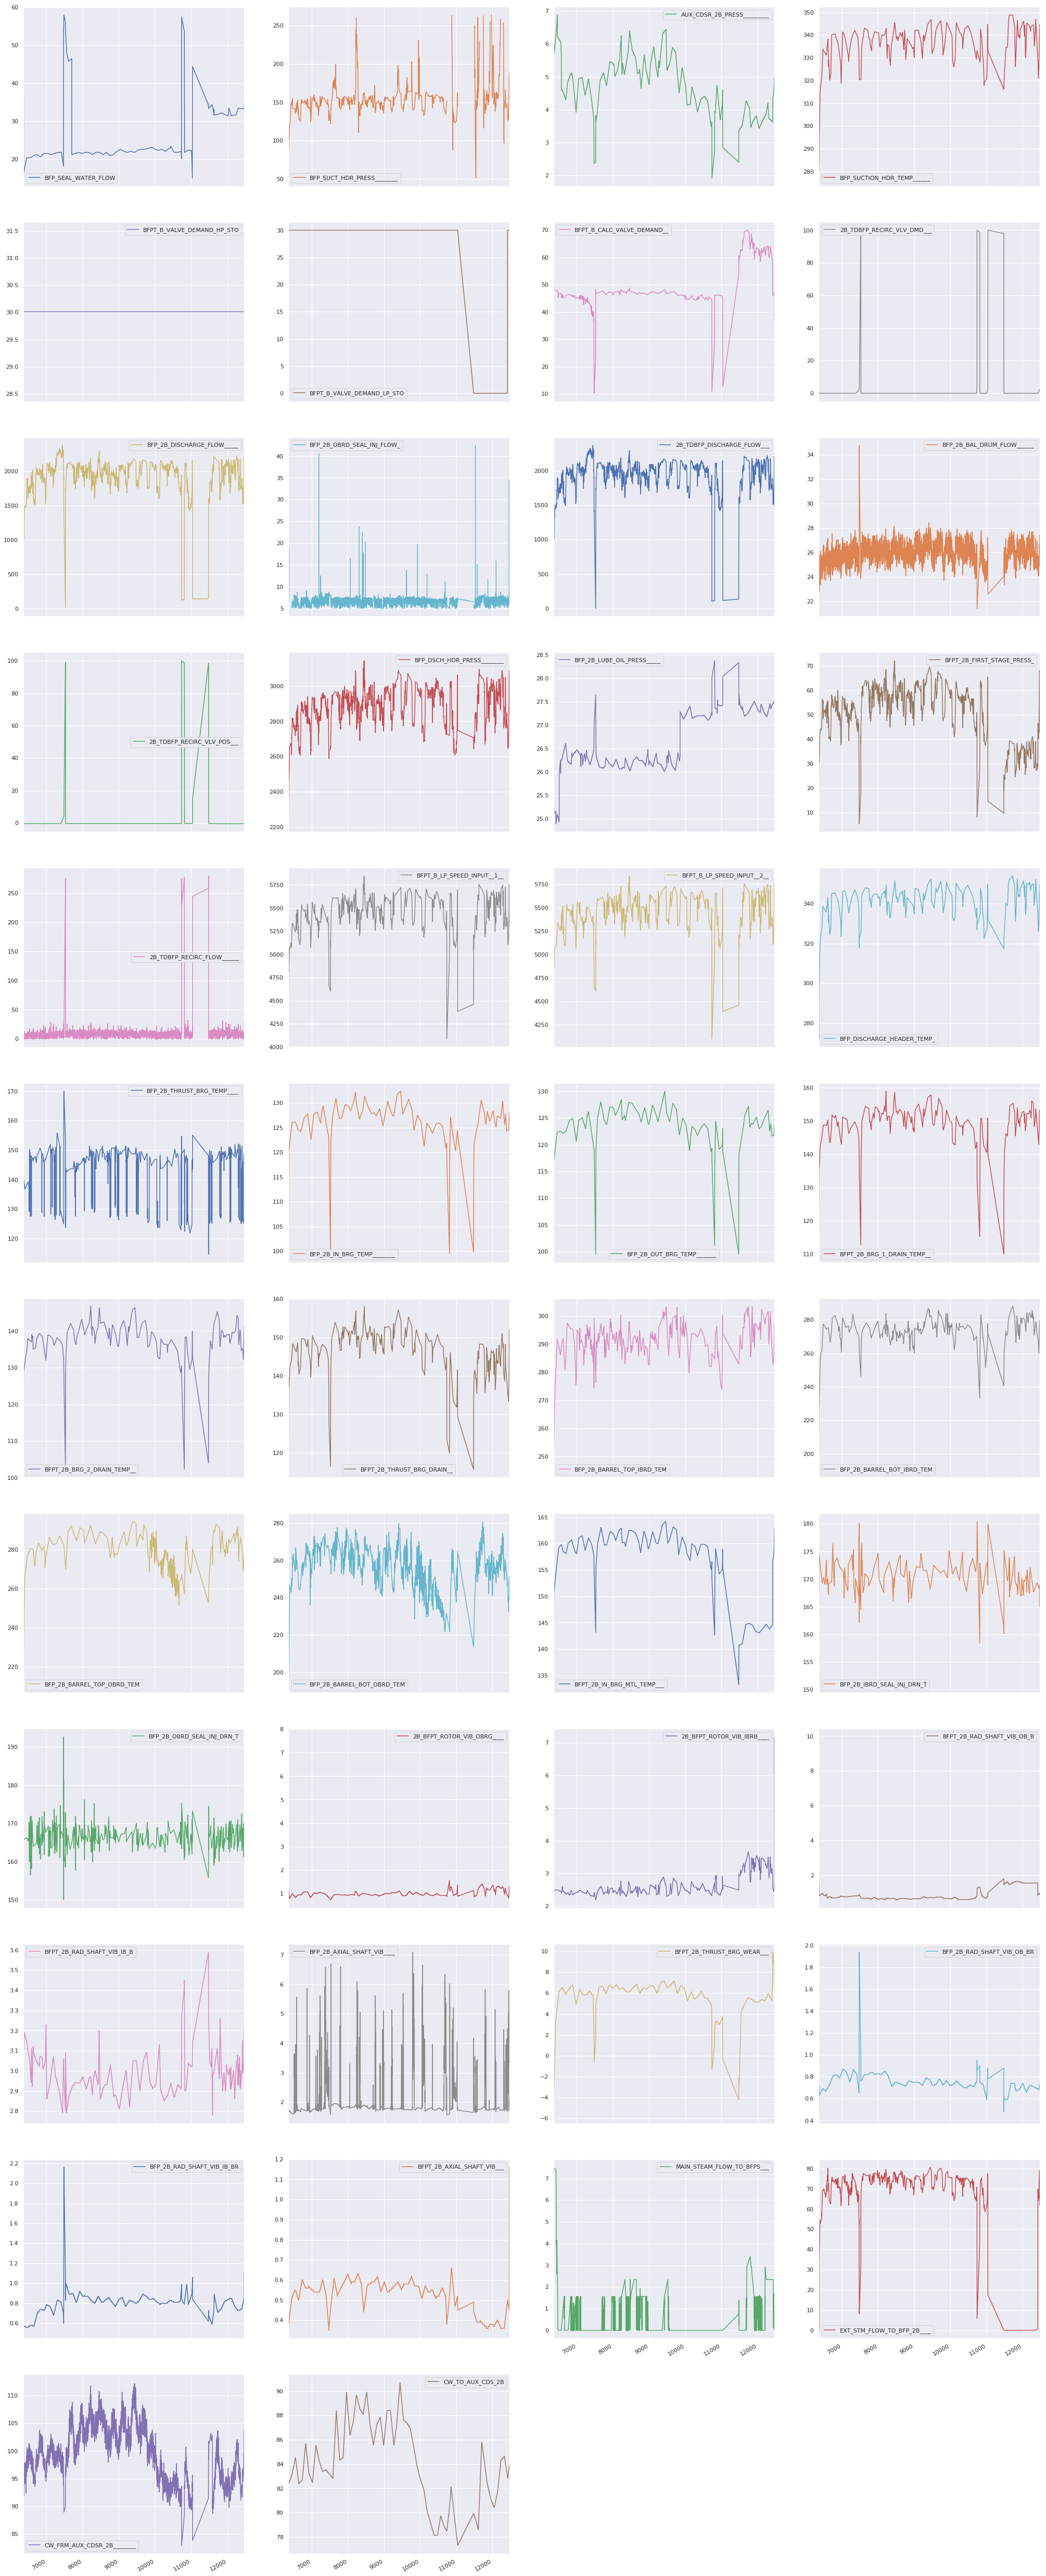

In [83]:
# Getting some idea of the sensor data distribution for all the sensors
df2.plot(subplots=True,layout=(12,4),figsize = (35,100))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f675078dc50>,
      dtype=object)

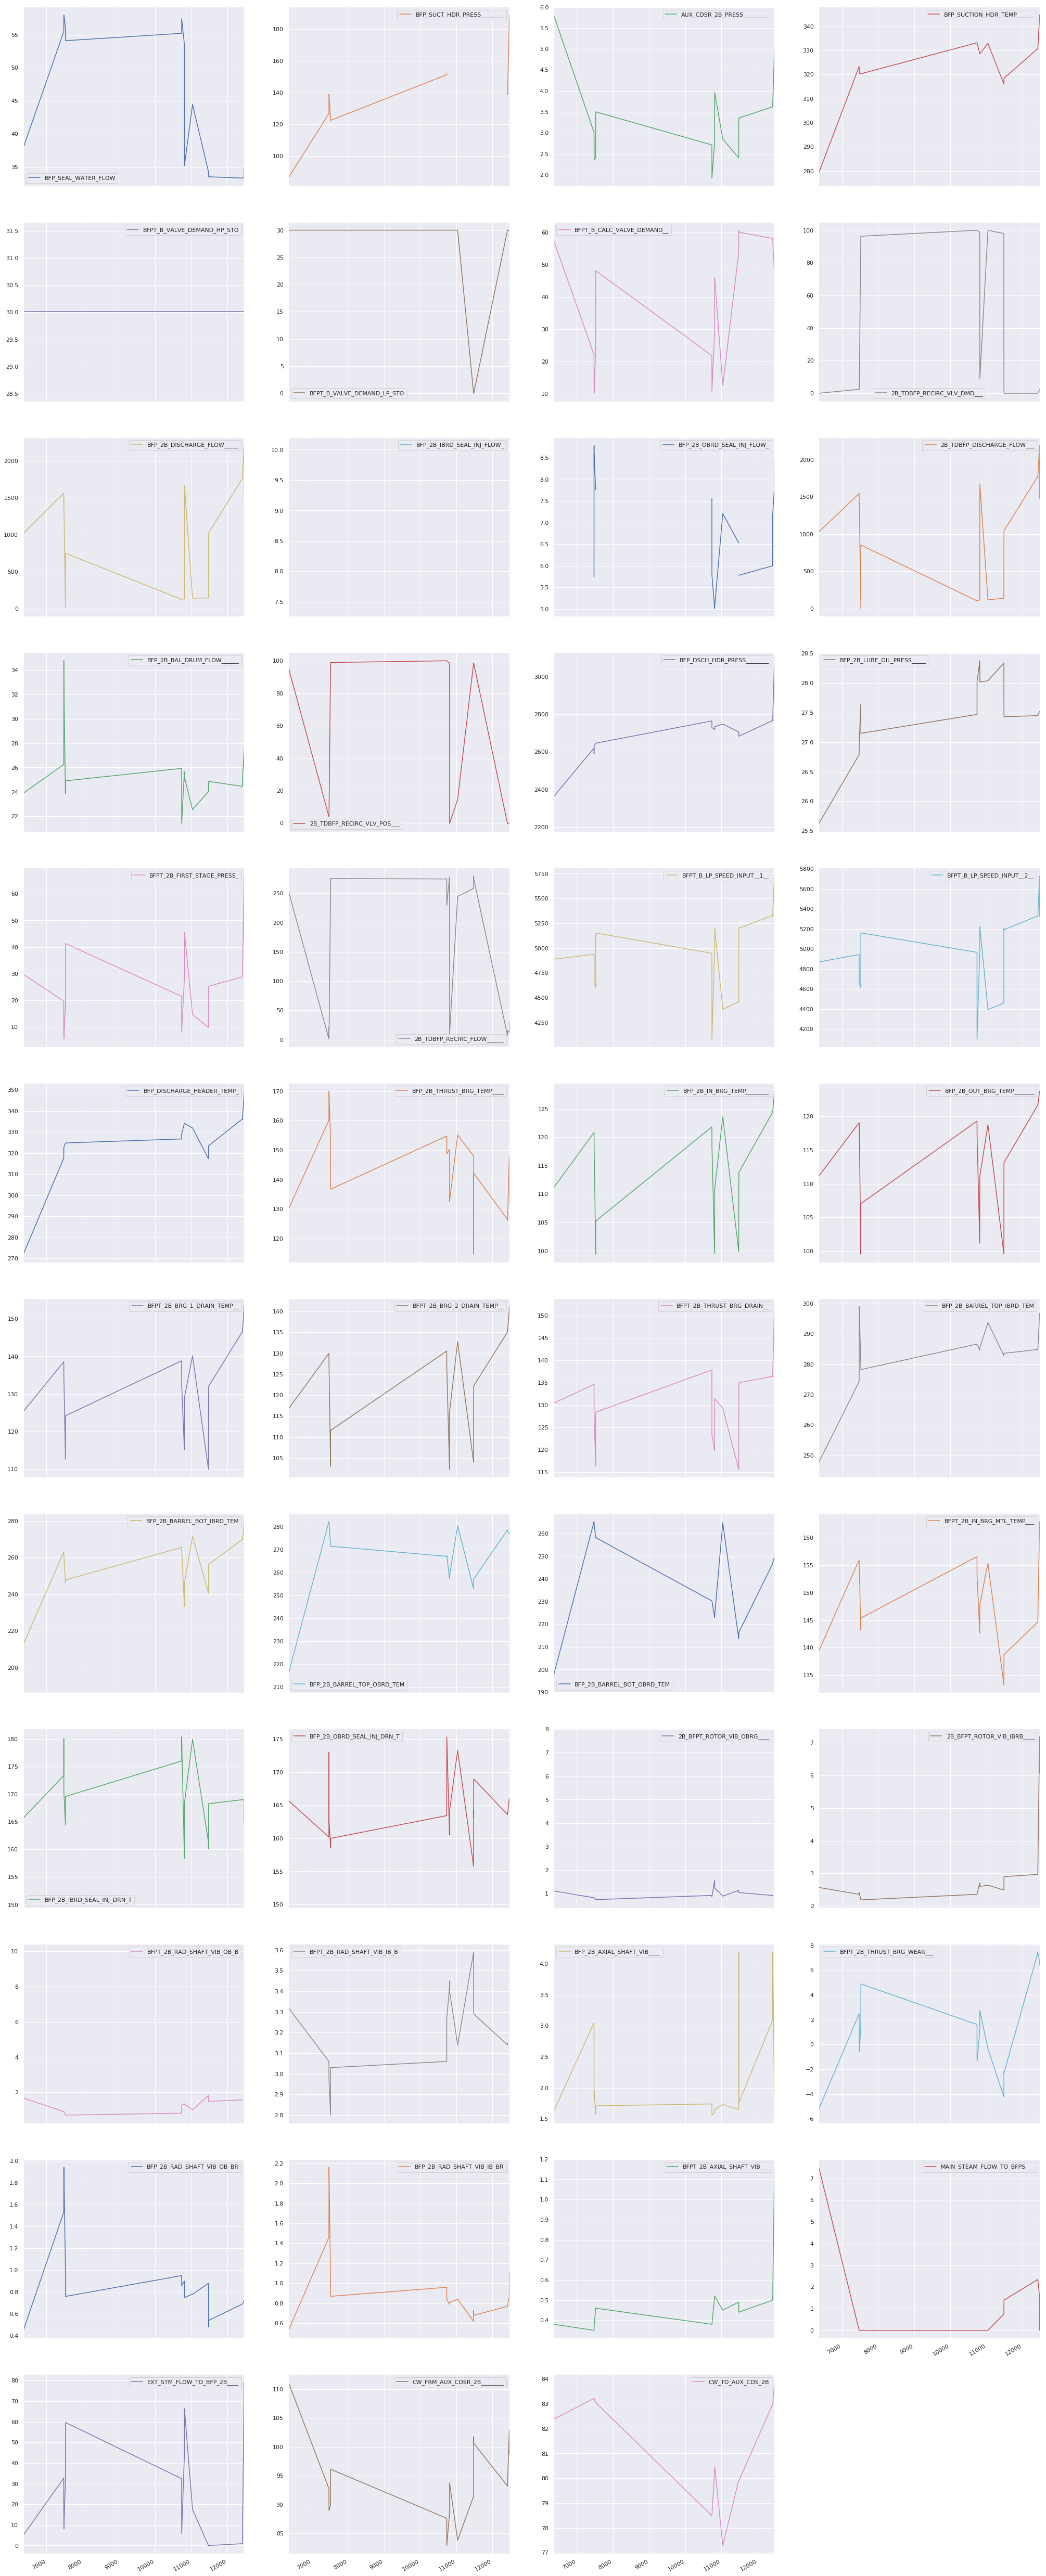

In [84]:
# Getting some idea of the sensor data distribution for all the sensors
anomaly_all.plot(subplots=True,layout=(12,4),figsize = (35,100))

In [85]:
anomaly_all.to_csv("Anomalous_values.csv")